In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

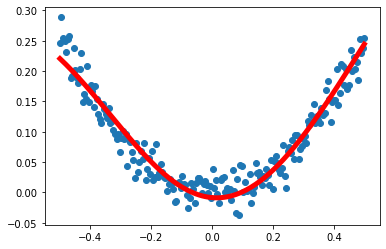

In [7]:
#开始模拟数据集
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]#转列，若是[np.newaxis,:]则是转行
noise = np.random.normal(0,0.02,x_data.shape)#正太分布，均值、方差、生成数据的size
y_data = np.square(x_data) + noise

#定义占位符号，模拟输入
#开始定义第一层，输入层：取决于x列维度，因为x为1列，所以只需要一个神经元
x = tf.placeholder(tf.float32,[None,1])#注意：后面的列表是定义形状,None表示行不确定，可以任意，列是一列
y = tf.placeholder(tf.float32,[None,1])#对于偏执单元的权重，我们没有必要进行随机初始化

#开始定义输入层到隐藏层L1的权重和偏执单元到L1层的权重
Weight_L1 = tf.Variable(tf.random.normal([1,10]))#注意：我们要将所有的权值初始值设置为随机值，原因见https://www.cnblogs.com/ssyfj/archive/2004/01/13/12820348.html
biases_L1 = tf.Variable(tf.zeros([1,10]))#注意：我们这里设置的偏执单元到隐藏层中的权重值，一直都是[1,L1层的激活单元数]。但是对于输入的激活单元因为是1维数据，所以是[1,L1的激活单元数]，如果维度为m,则权值变为[m,L1层的激活单元数]
#计算由于权重改变的权重信息
Wx_plus_b_L1 = tf.matmul(x,Weight_L1)+biases_L1 #计算隐藏层输入值
L1 = tf.nn.tanh(Wx_plus_b_L1) #计算激活项值


#开始定义隐藏层到输出层的信息（这里我们只有一个隐藏层，输出层为1个，因为维度是1）
Weight_L2 = tf.Variable(tf.random.normal([10,1]))#对比这两个权值矩阵，可以更好的理解上面
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weight_L2)+biases_L2
y_pred = tf.nn.tanh(Wx_plus_b_L2)#激活函数获取预测结果

#定义代价函数
loss = tf.reduce_mean(tf.square(y_pred-y_data))
#第一训练优化器,梯度下降法最小化代价函数
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    #训练完成，查看结果
    #获取预测值
    prediction_value = sess.run(y_pred,feed_dict={x:x_data}) #注意：这里是进行预测，我们传入的y_pred是一个预测函数，其中参数已经在上面进行了获取
    #绘图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,"r-",lw=5) #绘制线图，红色，线宽5
    plt.show()